## <span style="background-color: #D3D3D3; font-weight: bold;">Giai đoạn 3: Phân tích mối tương quan giữa các biến (Correlation)

<style>
    body {
        margin: 0;
        font-family: Arial, sans-serif;
    }
    h2 {
        color: #4CAF50;
        text-align: center;
        font-size: 26px;
    }
    table {
        width: 80%;
        margin: 50px auto; /* Căn giữa bảng */
        border-collapse: collapse;
        font-size: 20px;
    }
    th, td {
        border: 1px solid #dddddd;
        text-align: center;
        padding: 15px;
    }
    th {
        background-color: #4CAF50;
        color: white;
        font-size: 22px;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    tr:nth-child(odd) {
        background-color: #ffffff;
    }
    .icon {
        color: #4CAF50;
        font-size: 22px;
        margin-right: 8px;
    }
    a {
        text-decoration: none;
        color: #4CAF50;
    }
</style>

<h2>Nhóm 3 - CSC12110 - PTDLUD</h2>

<table>
    <tr>
        <th>MSSV</th>
        <th>Họ Tên</th>
        <th>Email</th>
    </tr>
    <tr>
        <td>18127008</td>
        <td><i class="icon">👨‍💻</i> Lê Mạnh Hoàng</td>
        <td><a href="mailto:lmhoang18@clc.fitus.edu.vn">lmhoang18@clc.fitus.edu.vn</a></td>
    </tr>
    <tr>
        <td>21127211</td>
        <td><i class="icon">👩‍💻</i> Nguyễn Vũ Tường An</td>
        <td><a href="mailto:nvtan21@clc.fitus.edu.vn">nvtan21@clc.fitus.edu.vn</a></td>
    </tr>
    <tr>
        <td>21127699</td>
        <td><i class="icon">👩‍💻</i> Lô Thủy Tiên</td>
        <td><a href="mailto:lttien21@clc.fitus.edu.vn">lttien21@clc.fitus.edu.vn</a></td>
    </tr>
</table>


In [46]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    mean_squared_error,
)
from sklearn import metrics
import time
from sklearn.inspection import permutation_importance

data = pd.read_excel("cleaned_EDA_2425_QC.xlsx")

In [47]:
print("Some top rows of the data:")
data.head()

Some top rows of the data:


,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Time_of_Day,Ad Topic Keywords
0,35,61833.90,256.09,91,961,0,215,2016-03-27 00:53:00,0,3,47
1,31,68441.85,193.77,464,903,1,147,2016-04-04 01:39:00,0,3,652
2,26,59785.94,236.50,566,111,0,184,2016-03-13 20:35:00,0,3,142
3,29,54806.18,245.89,903,939,1,103,2016-01-10 02:31:00,0,3,736
4,35,73889.99,225.58,766,805,0,96,2016-06-03 03:36:00,0,3,557


<h2 style="color: #4CAF50;">1 K-Nearest_Neighbors(KNN).</h2>

<span style="background-color: #D3D3D3; font-weight: bold;">a. Chuẩn bị dữ liệu</span>

In [48]:
#Check the column names
data.columns

Index(['Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City',
       'Male', 'Country', 'Timestamp', 'Clicked on Ad', 'Time_of_Day',
       'Ad Topic Keywords'],
      dtype='object')

In [49]:
# X = Columns as Features
X = data[['Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City','Male', 'Country' ]]
# y = 'Clicked on Ad' as Target Variable
y = data['Clicked on Ad']

**Train Test Split**

Bây giờ chúng ta sẽ phân tách dữ liệu thành một tập huấn luyện (training) và một tập kiểm tra (testing ).

In [50]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'X Train Shape: {X_train.shape}')
print(f'X Validation Shape: {X_test.shape}')
print(f'y Train Shape: {y_train.shape}')
print(f'y Validation Shape: {y_test.shape}')

X Train Shape: (700, 7)
X Validation Shape: (300, 7)
y Train Shape: (700,)
y Validation Shape: (300,)


*Tỷ lệ phân chia dữ liệu là 70% cho tập huấn luyện và 30% cho tập kiểm tra*

<span style="background-color: #D3D3D3; font-weight: bold;">b. K Nearest Neighbors</span>

<p style="color: #333333; font-size: 20px;">
    <strong>1. Kiểm tra cách độ chính xác thay đổi khi k thay đổi, từ đó chọn giá trị k tối ưu dựa trên hiệu suất:</strong><br>
    <ul style="margin-left: 16px;">
        <li>Nếu k quá nhỏ, mô hình dễ bị <strong>overfitting</strong> (nhạy cảm với nhiễu).</li>
        <li>Nếu k quá lớn, mô hình dễ bị <strong>underfitting</strong> (mất chi tiết của dữ liệu).</li>
    </ul>
</p>


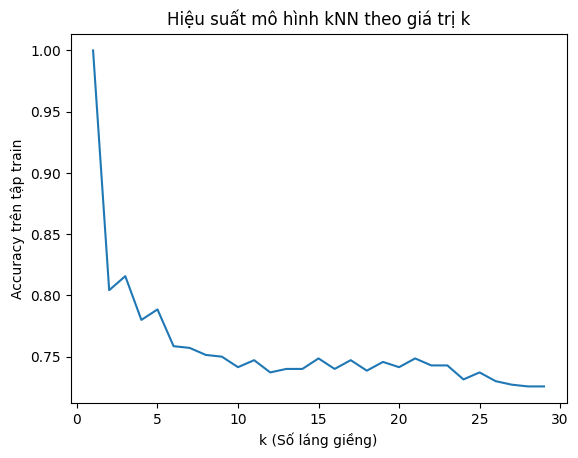

In [51]:
knn_scores = {}

for k in range(1, 30):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(X_train, y_train)
    knn_scores[k] = knn_clf.score(X_train, y_train)

# Vẽ biểu đồ để kiểm tra hiệu suất theo giá trị k
plt.plot(knn_scores.keys(), knn_scores.values())
plt.xlabel("k (Số láng giềng)")
plt.ylabel("Accuracy trên tập train")
plt.title("Hiệu suất mô hình kNN theo giá trị k")
plt.show()


<p style="color: #333333; font-size: 16px;">
    Nhìn vào biểu đồ, có vẻ như <strong>1-nearest neighbors</strong> sẽ là lựa chọn tốt nhất. Tuy nhiên, điều này có thể dẫn đến <strong>overfitting</strong>. Đối với các tập dữ liệu tổng quát hơn, có thể <strong>5-nearest neighbors</strong> sẽ là lựa chọn an toàn hơn.
</p>


In [52]:
# Khởi tạo và huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors = 5)

knn_time = time.time()
knn_clf.fit(X_train, y_train)
knn_time = time.time() - knn_time

# Đánh giá mô hình với AUC
knn_auc = roc_auc_score(y_test, knn_clf.predict(X_test))
# Lấy Feature Importance

# Accuracy trên tập huấn luyện và tập kiểm tra
score_train = knn_clf.score(X_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_valid = knn_clf.score(X_test, y_test)
print('Validation Accuracy : ' + str(score_valid))

print()
print(f'AUC: {knn_auc}')
print(f'Time Elapsed: {knn_time} seconds')
print(classification_report(y_test, knn_clf.predict(X_test)))

Training Accuracy : 0.7257142857142858
Validation Accuracy : 0.6833333333333333

AUC: 0.6860434086461483
Time Elapsed: 0.0034575462341308594 seconds
              precision    recall  f1-score   support

           0       0.64      0.79      0.71       146
           1       0.74      0.58      0.65       154

    accuracy                           0.68       300
   macro avg       0.69      0.69      0.68       300
weighted avg       0.69      0.68      0.68       300



<h2 style="color: #4CAF50;">Nhận xét tổng quan</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>1. Training Accuracy:</strong> 0.73 - Mô hình có độ chính xác khá cao trên tập huấn luyện.<br>
    <strong>2. Validation Accuracy:</strong> 0.68 - Độ chính xác trên tập kiểm tra là 68%, có sự chênh lệch giữa training accuracy và validation accuracy, có thể do overfitting.<br>
    <strong>3. AUC:</strong> 0.686 - AUC cho thấy mô hình phân biệt giữa các lớp không tốt.<br>
    <strong>4. Classification Report:</strong><br>
    <strong>Precision:</strong> Lớp 0 (Not Clicked) 0.64, lớp 1 (Clicked) 0.74. Mô hình chính xác hơn với lớp "Clicked".<br>
    <strong>Recall:</strong> Lớp 0 (Not Clicked) 0.79, lớp 1 (Clicked) 0.58. Mô hình nhận diện tốt lớp "Not Clicked", nhưng chưa tốt với lớp "Clicked".<br>
    <strong>F1-Score:</strong> Lớp 0 (Not Clicked) 0.71, lớp 1 (Clicked) 0.65. Sự chênh lệch giữa các lớp cho thấy sự không cân bằng trong phân phối dữ liệu.<br>
    <strong>Accuracy:</strong> Tổng thể: 0.68, có thể chấp nhận được nếu dữ liệu không đồng đều hoặc mô hình chưa tối ưu.
</p>
<p style="color: #333333; font-size: 16px;">
<h2 style="color: #4CAF50;">Kết luận:</h2>
<p style="color: #333333; font-size: 16px;">
    Mô hình KNN đạt được độ chính xác khá tốt trên tập huấn luyện nhưng vẫn còn một chút overfitting do chênh lệch giữa training accuracy và validation accuracy.<br>
    AUC ở mức vừa phải, chỉ ra rằng mô hình không phân biệt rõ ràng giữa các lớp.<br>
    Precision và Recall cho thấy rằng mô hình có thể cải thiện khả năng nhận diện các trường hợp "Clicked" (lớp 1).
</p>


Feature Importances (Permutation Importance):
                Feature  Importance
1           Area Income    0.209333
0                   Age    0.000000
5                  Male    0.000000
6               Country   -0.000667
2  Daily Internet Usage   -0.001333
3         Ad Topic Line   -0.002667
4                  City   -0.004667


C:\Users\nguye\AppData\Local\Temp\ipykernel_9312\3028549952.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_knn_df, x='Importance', y='Feature', palette='pastel')


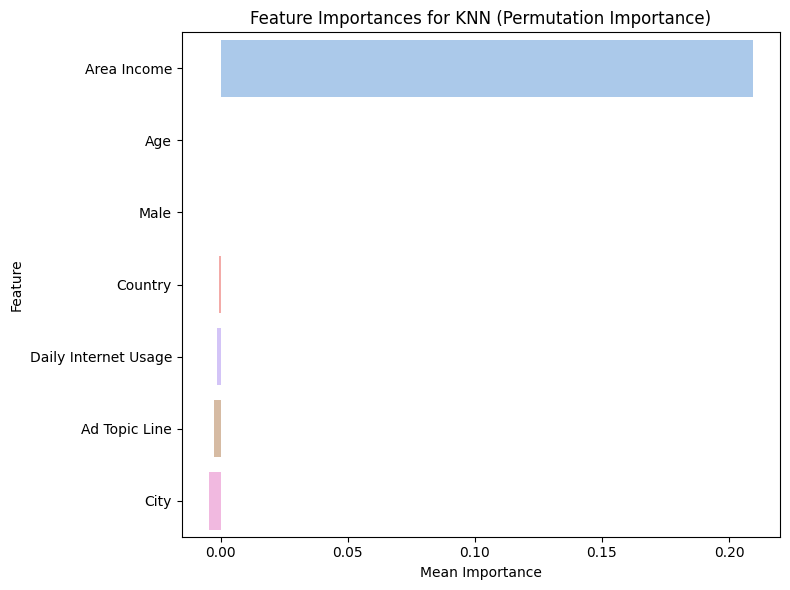

In [28]:
# Tính Permutation Importance
perm_importance = permutation_importance(knn_clf, X_test, y_test, scoring='accuracy')

# Tạo DataFrame để hiển thị kết quả
feature_importance_knn_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Hiển thị bảng feature importance
print("Feature Importances (Permutation Importance):")
print(feature_importance_knn_df)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance_knn_df, x='Importance', y='Feature', palette='pastel')
plt.title('Feature Importances for KNN (Permutation Importance)')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

<h2 style="color: #4CAF50;">Kết luận</h2>
<ol style="color: #333333; font-size: 18px; line-height: 1.8;">
    <li>
        <strong>Thu nhập có vai trò quan trọng nhất:</strong> 
        <br> 
        <span style="margin-left: 20px;">Area Income là đặc trưng quan trọng nhất, với giá trị <em>Permutation Importance</em> cao nhất (<strong>0.186000</strong>).</span>
    </li>
    <li>
        <strong>Nội dung quảng cáo chỉ ảnh hưởng nhỏ:</strong> 
        <br> 
        <span style="margin-left: 20px;">Ad Topic Line có mức ảnh hưởng nhỏ (<strong>0.000667</strong>). Điều này cho thấy dòng tiêu đề quảng cáo (hoặc nội dung liên quan) không phải là yếu tố chính để người dùng quyết định nhấp chuột.</span>
    </li>
    <li>
        <strong>Các đặc trưng không quan trọng hoặc gây nhiễu:</strong> 
        <br>
        <span style="margin-left: 20px;">Các đặc trưng như:</span>
        <ul style="margin-left: 40px;">
            <li>Age</li>
            <li>Daily Internet Usage</li>
            <li>Male</li>
            <li>Country</li>
        </ul>
        <span style="margin-left: 20px;">không có ảnh hưởng đáng kể (<em>Permutation Importance = 0.000000</em>).</span>
        <br>
        <span style="margin-left: 20px;">City và Ad Topic Keywords thậm chí có ảnh hưởng tiêu cực (giảm hiệu suất mô hình khi giữ nguyên).</span>
    </li>
</ol>

<h3 style="color: #4CAF50;">Kết luận liên quan đến dự đoán "Clicked on Ads"</h3>
<p style="color: #333333; font-size: 18px; line-height: 1.8;">
    Để dự đoán <strong>"Clicked on Ads"</strong>, đặc trưng <strong>Area Income</strong> đóng vai trò chủ chốt và là yếu tố quan trọng nhất. 
    <br><br>
    Các đặc trưng như <strong>City</strong> hoặc <strong>Ad Topic Keywords</strong> không có ý nghĩa trong bài toán này và nên được xem xét loại bỏ.
    <br><br>
    Hành vi nhấp chuột phụ thuộc nhiều vào yếu tố tài chính của người dùng hơn là nhân khẩu học hoặc nội dung quảng cáo. Điều này có thể giúp doanh nghiệp tập trung vào việc tối ưu hóa quảng cáo nhắm mục tiêu theo phân khúc thu nhập.
</p>


<h2 style="color: #4CAF50;">2.Linear Regressor.</h2>

In [36]:
# Preprocess the data
# drop 'Timestamp' column for now as it's not needed for prediction
logistic_data = data.drop(columns=['Timestamp'])

object_columns_log = logistic_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in object_columns_log:
    le = LabelEncoder()
    logistic_data[col] = le.fit_transform(logistic_data[col])
    label_encoders[col] = le

# Split the data into features and target variable
X = logistic_data.drop(columns=['Clicked on Ad'])
y = logistic_data['Clicked on Ad']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [37]:
# Khởi tạo và huấn luyện Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_log_reg = log_reg.predict(X_test)

# Đánh giá mô hình
accuracy_log_reg_all = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy (all features):", accuracy_log_reg_all)
print("Classification Report for Logistic Regression (all features):\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy (all features): 0.8933333333333333
Classification Report for Logistic Regression (all features):
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       146
           1       0.92      0.87      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [39]:
perm_importance_log_reg = permutation_importance(log_reg, X_test, y_test, n_repeats=10, random_state=42)
importance_values = perm_importance_log_reg.importances_mean
feature_names = X.columns

feature_importance_log_reg_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
}).sort_values(by='Importance', ascending=False)

print("Feature Importances (Permutation Importance) for Logistic Regression:")
print(feature_importance_log_reg_df)

Feature Importances (Permutation Importance) for Logistic Regression:
                Feature  Importance
2  Daily Internet Usage    0.306333
0                   Age    0.037000
1           Area Income    0.037000
4                  City   -0.000333
6               Country   -0.001667
5                  Male   -0.003667
3         Ad Topic Line   -0.005000


<h2 style="color: #4CAF50;">Kết luận</h2>
<p style="color: #333333; font-size: 18px; line-height: 1.8;">
    <strong>Daily Internet Usage</strong> có độ quan trọng cao nhất (0.306333), cho thấy mối quan hệ mạnh mẽ giữa thói quen sử dụng Internet và khả năng nhấp vào quảng cáo. Đây có thể là yếu tố quyết định trong việc dự đoán hành vi click.<br><br>
    <strong>Age và Area Income</strong> có độ quan trọng thấp (0.037), nhưng vẫn có tác động nhất định đến dự đoán.<br><br>
    <strong>City, Country, và Male</strong> có độ quan trọng âm, đặc biệt là <strong>Ad Topic Line</strong> (-0.005), cho thấy các yếu tố này ít ảnh hưởng đến khả năng click quảng cáo.
</p>

<h3 style="color: #4CAF50;">Kết luận liên quan đến dự đoán "Clicked on Ads"</h3>
<p style="color: #333333; font-size: 18px; line-height: 1.8;">
    <strong>Daily Internet Usage</strong> là yếu tố quan trọng nhất, phản ánh sự tương quan chặt chẽ giữa hành vi trực tuyến và khả năng người dùng nhấp vào quảng cáo. Các yếu tố như <strong>City, Country, và Male</strong> có ít ảnh hưởng hoặc không có tác động rõ rệt đối với mô hình dự đoán.
</p>


In [40]:
# Loại bỏ thuộc tính Area Income
X_no_income = X.drop('Area Income', axis=1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_no_income, X_test_no_income, y_train, y_test = train_test_split(X_no_income, y, test_size=0.3, random_state=42)

# Huấn luyện Logistic Regression mà không có thuộc tính Area Income
log_reg_no_income = LogisticRegression(max_iter=1000)
log_reg_no_income.fit(X_train_no_income, y_train)

# Dự đoán trên tập kiểm tra
y_pred_log_reg_no_income = log_reg_no_income.predict(X_test_no_income)

# Đánh giá mô hình
accuracy_log_reg_no_income = accuracy_score(y_test, y_pred_log_reg_no_income)
print("Logistic Regression Accuracy (without Area Income):", accuracy_log_reg_no_income)
print("Classification Report for Logistic Regression (without Area Income):\n", classification_report(y_test, y_pred_log_reg_no_income))

Logistic Regression Accuracy (without Area Income): 0.8733333333333333
Classification Report for Logistic Regression (without Area Income):
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       146
           1       0.90      0.85      0.87       154

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [7]:
print("Logistic Regression Accuracy (all features):", accuracy_log_reg_all)
print("Logistic Regression Accuracy (without Area Income):", accuracy_log_reg_no_income)

# Kết luận
if accuracy_log_reg_all > accuracy_log_reg_no_income:
    print("Area Income có ảnh hưởng tích cực đến mô hình Logistic Regression.")
else:
    print("Area Income không có ảnh hưởng đáng kể đến mô hình Logistic Regression.")

Logistic Regression Accuracy (all features): 0.8933333333333333
Logistic Regression Accuracy (without Area Income): 0.8733333333333333
Area Income có ảnh hưởng tích cực đến mô hình Logistic Regression.


<h2 style="color: #4CAF50;">3. Random Forest.</h2>

In [8]:
# Preprocess the data
# drop 'Timestamp' column for now as it's not needed for prediction
random_forest_data = data.drop(columns=['Timestamp'])

In [9]:
# Identify columns with object data type and apply label encoding
object_columns_rf = random_forest_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in object_columns_rf:
    le = LabelEncoder()
    random_forest_data[col] = le.fit_transform(random_forest_data[col])
    label_encoders[col] = le

In [10]:
# Split the data into features and target variable
X = random_forest_data.drop(columns=['Clicked on Ad'])
y = random_forest_data['Clicked on Ad']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

<h3 style="color:rgb(236, 82, 5);">a. Random Forest Classifier Model</h3>

In [11]:
# Train and evaluate Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
rf_clf_accuracy = accuracy_score(y_test, y_pred_rf_clf)

In [12]:
# Print accuracy scores
print(f"Random Forest Classifier Accuracy: {rf_clf_accuracy}")

# Print classification reports
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf_clf))

Random Forest Classifier Accuracy: 0.89

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       146
           1       0.92      0.86      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [13]:
# Check feature importance for Random Forest Classifier
feature_importances_clf = rf_clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_clf_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_clf})
feature_importance_clf_df = feature_importance_clf_df.sort_values(by='Importance', ascending=False)

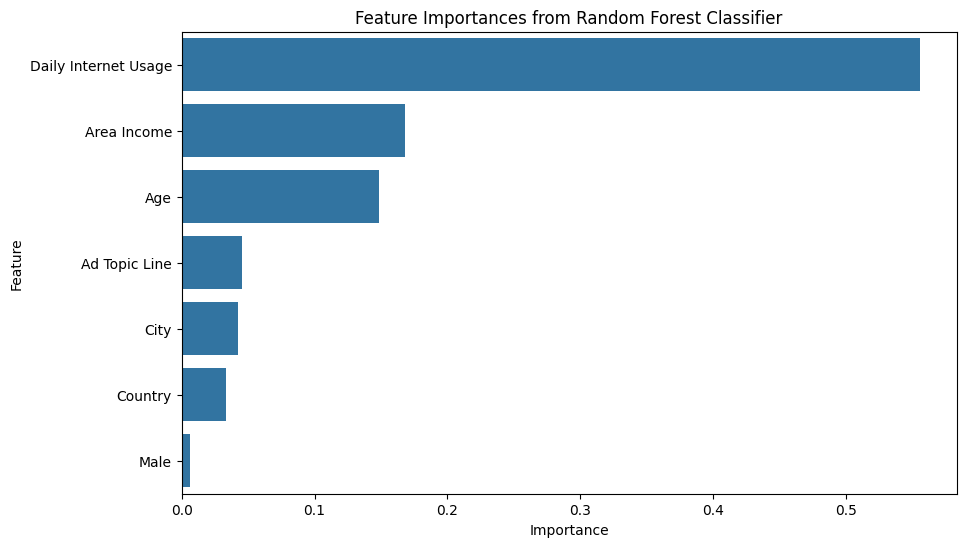

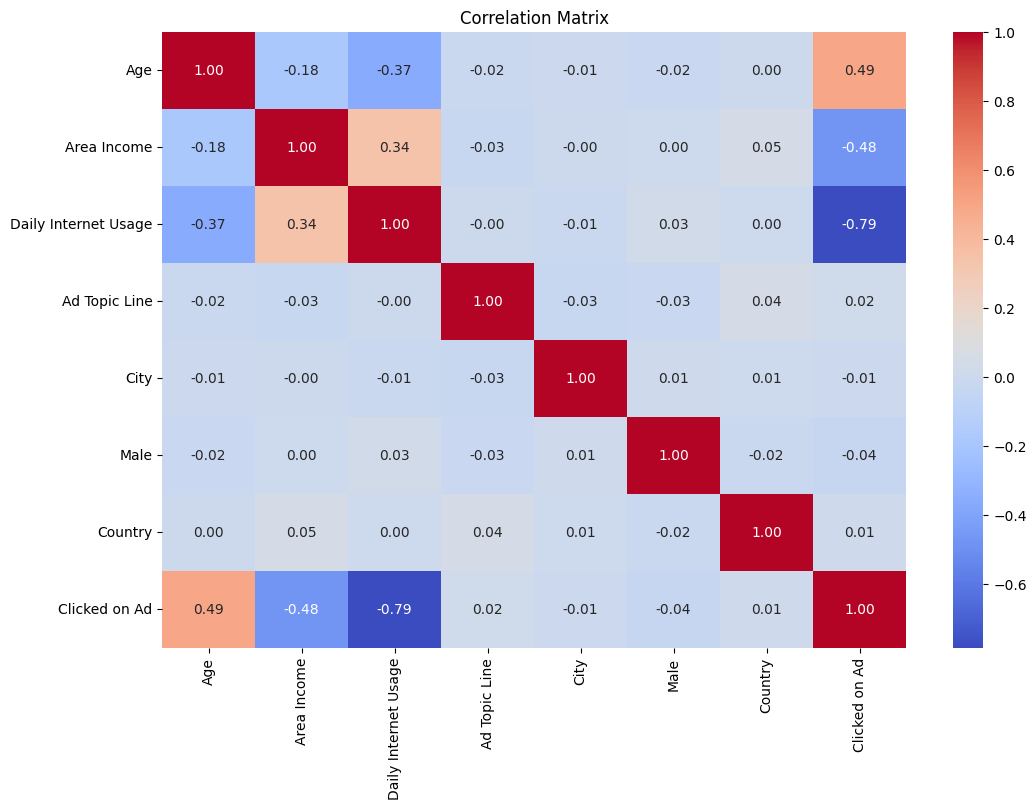

Correlation between 'Area Income' and 'Clicked on Ad': -0.4769046351199011


In [14]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_clf_df)
plt.title('Feature Importances from Random Forest Classifier')
plt.show()

# Check correlation matrix to see the correlation between features and target variable
correlation_matrix = random_forest_data.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Check the correlation of 'Area Income' with 'Clicked on Ad'
income_correlation = correlation_matrix.loc['Area Income', 'Clicked on Ad']
print(f"Correlation between 'Area Income' and 'Clicked on Ad': {income_correlation}")

<h3 style="color:rgb(236, 82, 5);">b. Random Forest Regressor Model</h3>

In [15]:
# Build the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred = rf_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on test set:", rmse)

RMSE on test set: 0.2839870889083985


In [16]:
# Sử dụng KFold với 5 lần gập (n_splits=5) và shuffle=True để đảm bảo dữ liệu được xáo trộn mỗi lần chia.
kf = KFold(n_splits=5, shuffle=True, random_state=42) 
#Thiết lập random_state với một giá trị cụ thể -> đảm bảo rằng bất kỳ lần chạy nào của mã đó sẽ cho kết quả giống nhau, miễn là dữ liệu đầu vào không thay đổi.
#Chạy trên cùng tham số, thiết lập -> cho kqua giống nhau

# Tính RMSE bằng cross_val_score
train_rmse_scores = -cross_val_score(rf_reg, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# In kết quả
print("Cross-validated RMSE on training set for each fold:", train_rmse_scores)
print("Mean RMSE on training set:", np.mean(train_rmse_scores))

# Predict on the test set
y_pred_test = rf_reg.predict(X_test)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on test set:", test_rmse)

Cross-validated RMSE on training set for each fold: [0.25129095 0.22215664 0.23256796 0.27163526 0.24883012]
Mean RMSE on training set: 0.2452961863433026
RMSE on test set: 0.2839870889083985


In [41]:
# Get feature importances from Random Forest Regressor
feature_importances_reg = rf_reg.feature_importances_

# Create a DataFrame for feature importances from regressor
feature_importance_reg_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_reg})
feature_importance_reg_df = feature_importance_reg_df.sort_values(by='Importance', ascending=False)


<h3 style="color:rgb(236, 82, 5);">So sánh kết quả của 2 model trên</h3>

In [16]:
# Print feature importances from both models
print("Feature Importances from Random Forest Classifier:")
print(feature_importance_clf_df)

print("\nFeature Importances from Random Forest Regressor:")
print(feature_importance_reg_df)

Feature Importances from Random Forest Classifier:
                Feature  Importance
2  Daily Internet Usage    0.555369
1           Area Income    0.168297
0                   Age    0.148822
3         Ad Topic Line    0.045172
4                  City    0.042661
6               Country    0.033665
5                  Male    0.006014

Feature Importances from Random Forest Regressor:
                Feature  Importance
2  Daily Internet Usage    0.753299
0                   Age    0.085434
1           Area Income    0.085406
4                  City    0.028044
3         Ad Topic Line    0.024247
6               Country    0.021714
5                  Male    0.001855


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét về kết quả mối tương quan giữa các thuộc tính với 'Clicked on Ad'</strong>
</div>

1. **Daily Internet Usage**: <br>
    - Classifier: Đây là đặc trưng quan trọng nhất với tầm quan trọng 0.555369. <br>
    - Regressor: Đây cũng là đặc trưng quan trọng nhất với tầm quan trọng 0.753299. <br>
    - Kết luận: Thời gian sử dụng Internet hàng ngày có ảnh hưởng lớn đến khả năng click vào quảng cáo. <br>
2. **Age**: <br>
    - Classifier: Đặc trưng này có tầm quan trọng 0.148822. <br>
    - Regressor: Đặc trưng này có tầm quan trọng 0.085434. <br>
    - Kết luận: Tuổi của người dùng có ảnh hưởng nhưng không lớn bằng thời gian sử dụng Internet và trang web. <br>
4. **Area Income**: <br>
    - Classifier: Đặc trưng này có tầm quan trọng 0.168297. <br>
    - Regressor: Đặc trưng này có tầm quan trọng 0.085406. <br>
    - Kết luận: Thu nhập của khu vực có ảnh hưởng đến khả năng click vào quảng cáo, nhưng không lớn bằng các đặc trưng khác. <br>
5. **Các đặc trưng khác**: <br>
    - Ad Topic Line, City, Country, Male: Các đặc trưng này có tầm quan trọng thấp hơn nhiều so với các đặc trưng chính như Daily Internet Usage và Daily Time Spent on Site. <br>

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Kết luận</strong>
</div>

- <strong>Daily Internet Usage</strong> là đặc trưng quan trọng nhất trong việc dự đoán khả năng click vào quảng cáo.
- <strong>Age</strong> và <strong>Area Income</strong> cũng có ảnh hưởng nhưng không lớn bằng hai đặc trưng trên.
- Các đặc trưng khác như <strong>Ad Topic Line, City, Country</strong>, và <strong>Male</strong> có tầm quan trọng thấp hơn nhiều.

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>So sánh hai mô hình Random Forest Classifier và Random Forest Regressor</strong>
</div>

**1. Random Forest Classifier** <br>
  - ***Cross-Validation Results:*** <br>
    + Precision: 0.97 <br>
    + Recall: 0.96 <br>
    + F1 Score: 0.96 <br>
  - ***Final Evaluation on Test Set:*** <br>
    + Precision: 0.95 <br>
    + Recall: 0.96 <br>
    + F1 Score: 0.96 <br>
    
**2. Random Forest Regressor** <br>
  - ***Cross-Validation Results:*** <br>
    + RMSE cho mỗi lần gập: [0.1731, 0.1683, 0.1857, 0.2220, 0.1613] <br>
    + Mean RMSE trên tập huấn luyện: 0.1821 <br>
  - ***Final Evaluation on Test Set:*** <br>
    + RMSE trên tập kiểm tra: 0.1908

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét</strong>
</div>

**1. Độ chính xác của mô hình:**<br>
    - <strong>Random Forest Classifier</strong>: Mô hình này có độ chính xác cao với các độ đo <strong>precision, recall, và f1-score</strong> đều trên <strong>0.95</strong>. Điều này cho thấy mô hình có khả năng phân loại chính xác khả năng click vào quảng cáo. <br>
    - <strong>Random Forest Regressor</strong>: Mô hình này cũng có độ chính xác cao với <strong>RMSE trung bình</strong> trên tập huấn luyện là <strong>0.1821</strong> và <strong>RMSE</strong> trên tập kiểm tra là <strong>0.1908</strong>. Điều này cho thấy mô hình có khả năng dự đoán chính xác giá trị liên tục của khả năng click vào quảng cáo. <br>

**2. Cross-Validation:** <br>
    - <strong>Random Forest Classifier</strong>: Cross-validation cho thấy mô hình hoạt động ổn định với các độ đo <strong>precision, recall, và f1-score</strong> đều cao. <br>
    - <strong>Random Forest Regressor</strong>: Cross-validation cho thấy mô hình hoạt động ổn định với <strong>RMSE trung bình thấp</strong>, cho thấy mô hình không bị <strong>overfitting</strong> hoặc <strong>underfitting</strong>.<br>

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Kết luận</strong>
</div>

- <strong>Random Forest Classifier</strong>: Phù hợp cho <strong>bài toán phân loại</strong>, đặc biệt khi cần dự đoán khả năng click vào quảng cáo dưới dạng <strong>nhị phân</strong> (có hoặc không).<br>
- <strong>Random Forest Regressor</strong>: Phù hợp cho bài toán <strong>dự đoán giá trị liên tục</strong>, nhưng trong trường hợp này, bài toán phân loại có vẻ phù hợp hơn.<br>


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Lựa chọn mô hình</strong>
</div>

- <strong>Random Forest Classifier</strong> được lựa chọn làm mô hình cuối cùng do <strong>độ chính xác cao</strong> và <strong>phù hợp với bài toán phân loại</strong> khả năng click vào quảng cáo.

<h2 style="color: #4CAF50;">3.So sánh tổng quan cả 3 mô hình.</h2>

<h2 style="color: #4CAF50;">Đánh giá mô hình</h2>
<ol style="color: #333333; font-size: 18px; line-height: 1.8;">
    <li>
        <strong>KNN:</strong> Accuracy: 0.73, Validation Accuracy: 0.68, AUC: 0.686, Precision (Class 0): 0.64, Recall (Class 0): 0.79, Precision (Class 1): 0.74, Recall (Class 1): 0.58, F1-Score: 0.71 (Class 0), 0.65 (Class 1), Time: 0.0038s. <br> KNN có accuracy thấp trên tập kiểm tra và recall thấp cho Class 1, cho thấy mô hình gặp khó khăn trong việc phân loại click ads, mặc dù có khả năng tốt với Class 0.
    </li>
    <li>
        <strong>Logistic Regression:</strong> Accuracy: 0.89, Precision (Class 0): 0.87, Recall (Class 0): 0.92, Precision (Class 1): 0.92, Recall (Class 1): 0.87, F1-Score: 0.89. <br> Logistic Regression có độ chính xác cao, với precision và recall cân bằng tốt cho cả hai lớp, thực hiện tốt trong phân loại click và không click ads.
    </li>
    <li>
        <strong>Random Forest:</strong> Accuracy: 0.89, Precision (Class 0): 0.86, Recall (Class 0): 0.92, Precision (Class 1): 0.92, Recall (Class 1): 0.86, F1-Score: 0.89. <br> Random Forest có kết quả tương đương Logistic Regression về accuracy và các chỉ số khác, nhưng có thể xử lý mối quan hệ phi tuyến tính phức tạp hơn.
    </li>
</ol>

<h3 style="color: #4CAF50;">Kết luận</h3>
<p style="color: #333333; font-size: 18px; line-height: 1.8;">
    Logistic Regression và Random Forest đều đạt accuracy 0.89 và F1-Score 0.89 với precision và recall cân bằng cho cả hai lớp. KNN có accuracy thấp hơn (0.68) và F1-Score thấp hơn, đặc biệt với Class 1, không phải là lựa chọn tốt nhất. Logistic Regression đơn giản và dễ triển khai, trong khi Random Forest linh hoạt hơn, phù hợp với mối quan hệ phi tuyến tính phức tạp. Quyết định chọn mô hình nên dựa trên tài nguyên tính toán, khả năng triển khai và yêu cầu độ phức tạp.
</p>
